In [4]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [11]:
print("Shape: ", df.shape)
df.head()

Shape:  (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## DATA CLEANING

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
#drop last 3 cols as they have insignificant values
df=df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [15]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
df['target'] = encoder.fit_transform(df['target'])

In [19]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
df.duplicated().sum()

403

In [24]:
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

## EDA

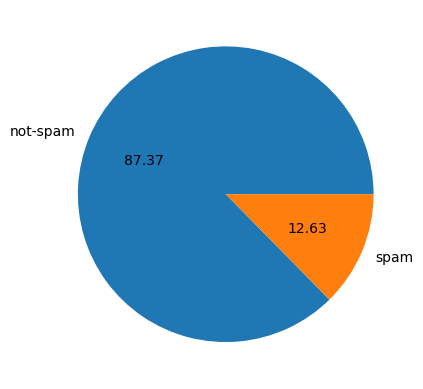

In [26]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['not-spam', 'spam'], autopct="%0.2f")
plt.show()


In [39]:
import re

df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(x.split()))
df['num_sentences'] = df['text'].apply(lambda x: len([s for s in re.split(r'[.!?]', x) if s.strip()]))

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [ ]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,15.340685,2.304508
std,0.332253,58.236293,11.068488,1.639932
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,7.000000,1.000000
50%,0.000000,60.000000,12.000000,2.000000
75%,0.000000,117.000000,22.000000,3.000000
max,1.000000,910.000000,171.000000,31.000000


In [42]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

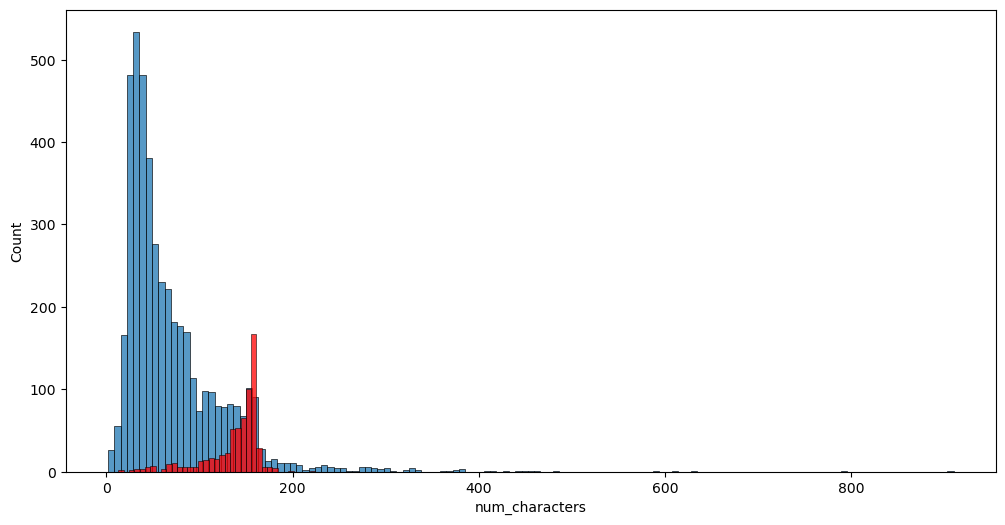

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

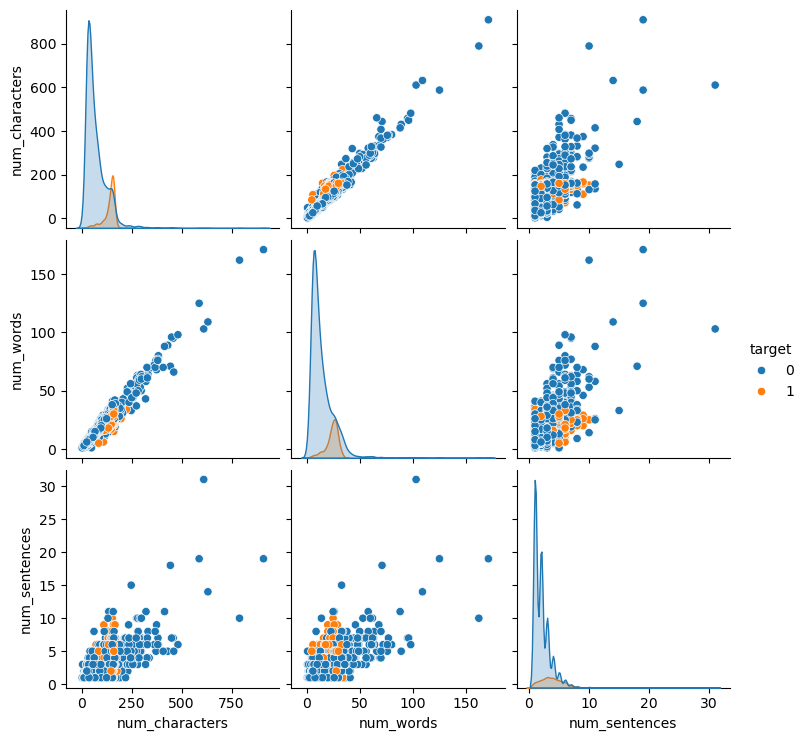

In [44]:
sns.pairplot(df,hue='target')


<Axes: >

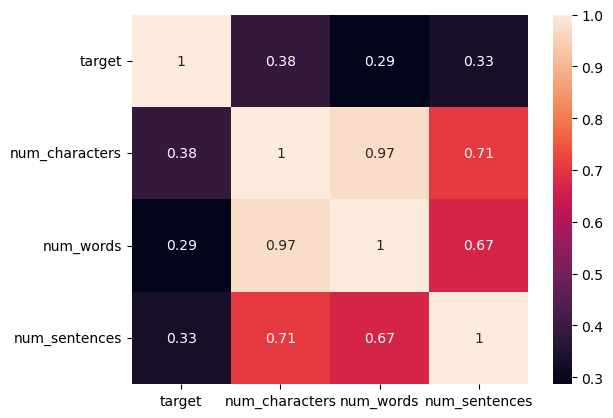

In [ ]:
# HEATMAP FOR STRING
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)

## Data Preprocessing